NETTOYAGE DES DONNÉES - DÉTECTION ANOMALIES FINANCIÈRES
Dataset: Taiwanese Bankruptcy Prediction

1. CHARGEMENT DES DONNÉES BRUTES
--------------------------------------------------------------------------------
✅ Dataset chargé
Dimensions initiales: (6819, 96)
Mémoire utilisée: 4.99 MB

2. INSPECTION INITIALE DE LA QUALITÉ DES DONNÉES
--------------------------------------------------------------------------------

📊 État initial:
   Observations: 6,819
   Variables: 96
   Valeurs manquantes: 0
   Duplicatas: 0

📋 Types de données:
float64    93
int64       3
Name: count, dtype: int64

3. TRAITEMENT DES VALEURS MANQUANTES
--------------------------------------------------------------------------------

✅ Aucune valeur manquante détectée!

4. SUPPRESSION DES DUPLICATAS
--------------------------------------------------------------------------------
Duplicatas détectés: 0
✅ Aucun duplicata détecté

5. DÉTECTION ET TRAITEMENT DES OUTLIERS
-------------------------------------------------

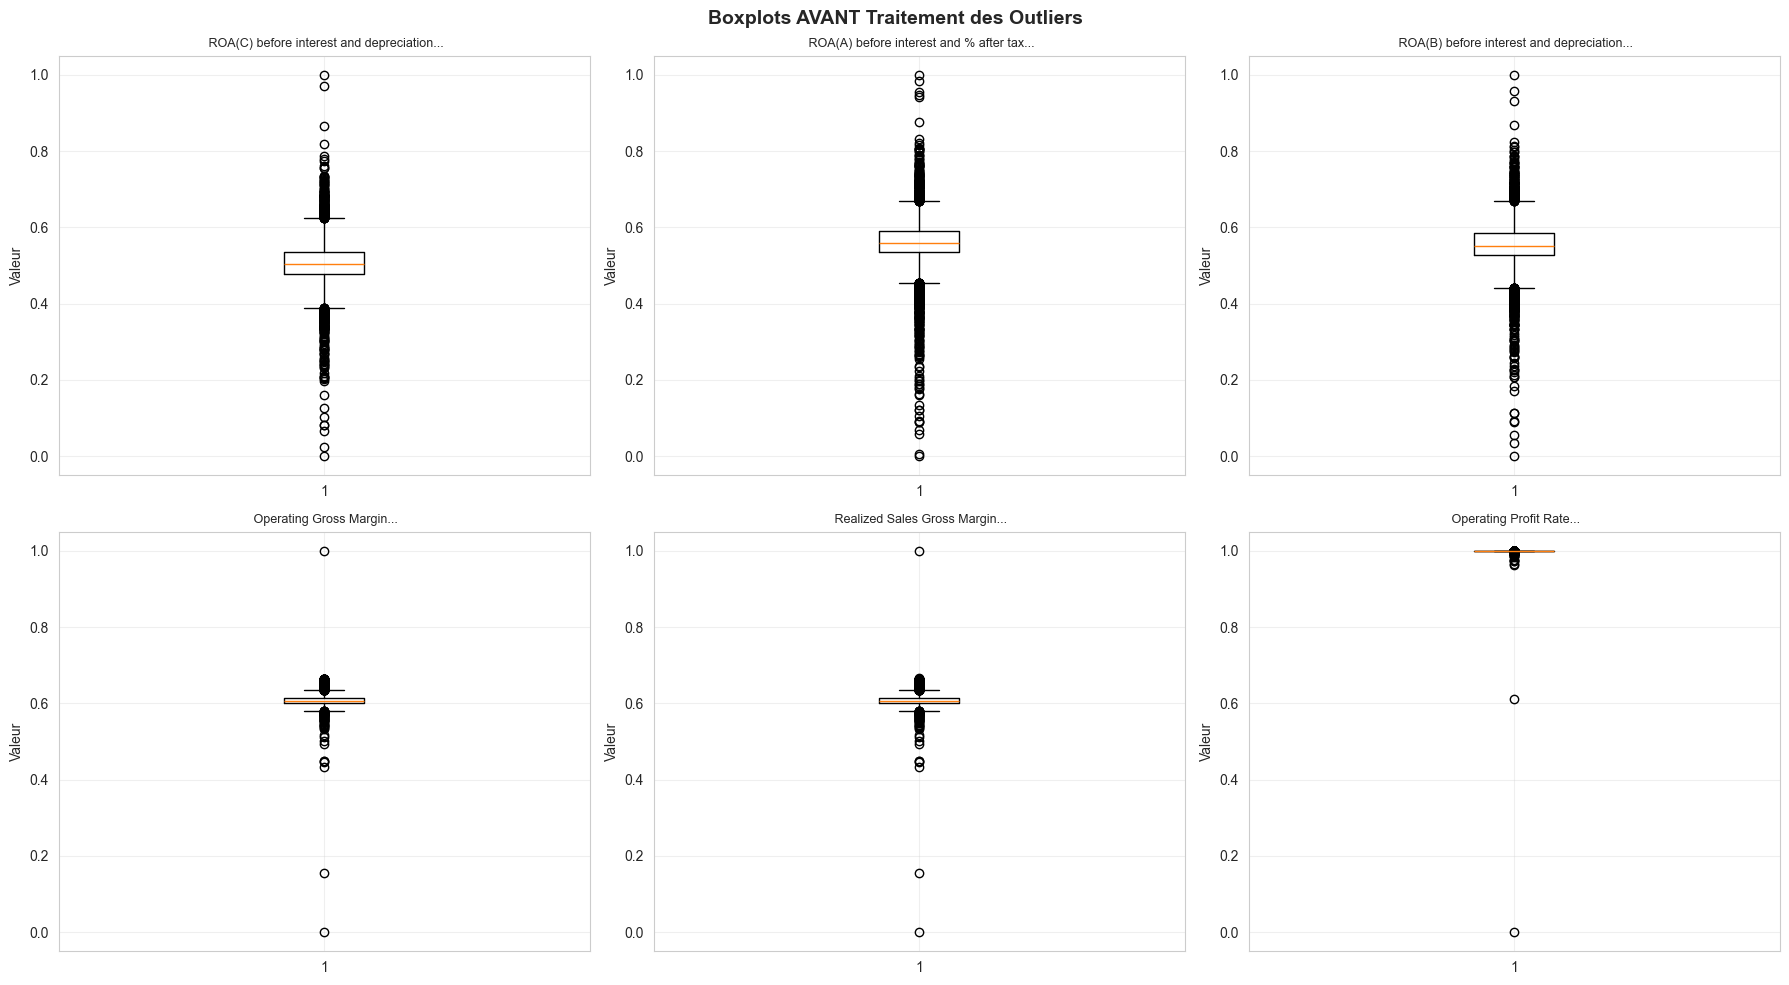


🔧 Traitement des outliers (Winsorization)...
✅ Outliers traités par winsorization (1er-99ème percentiles)


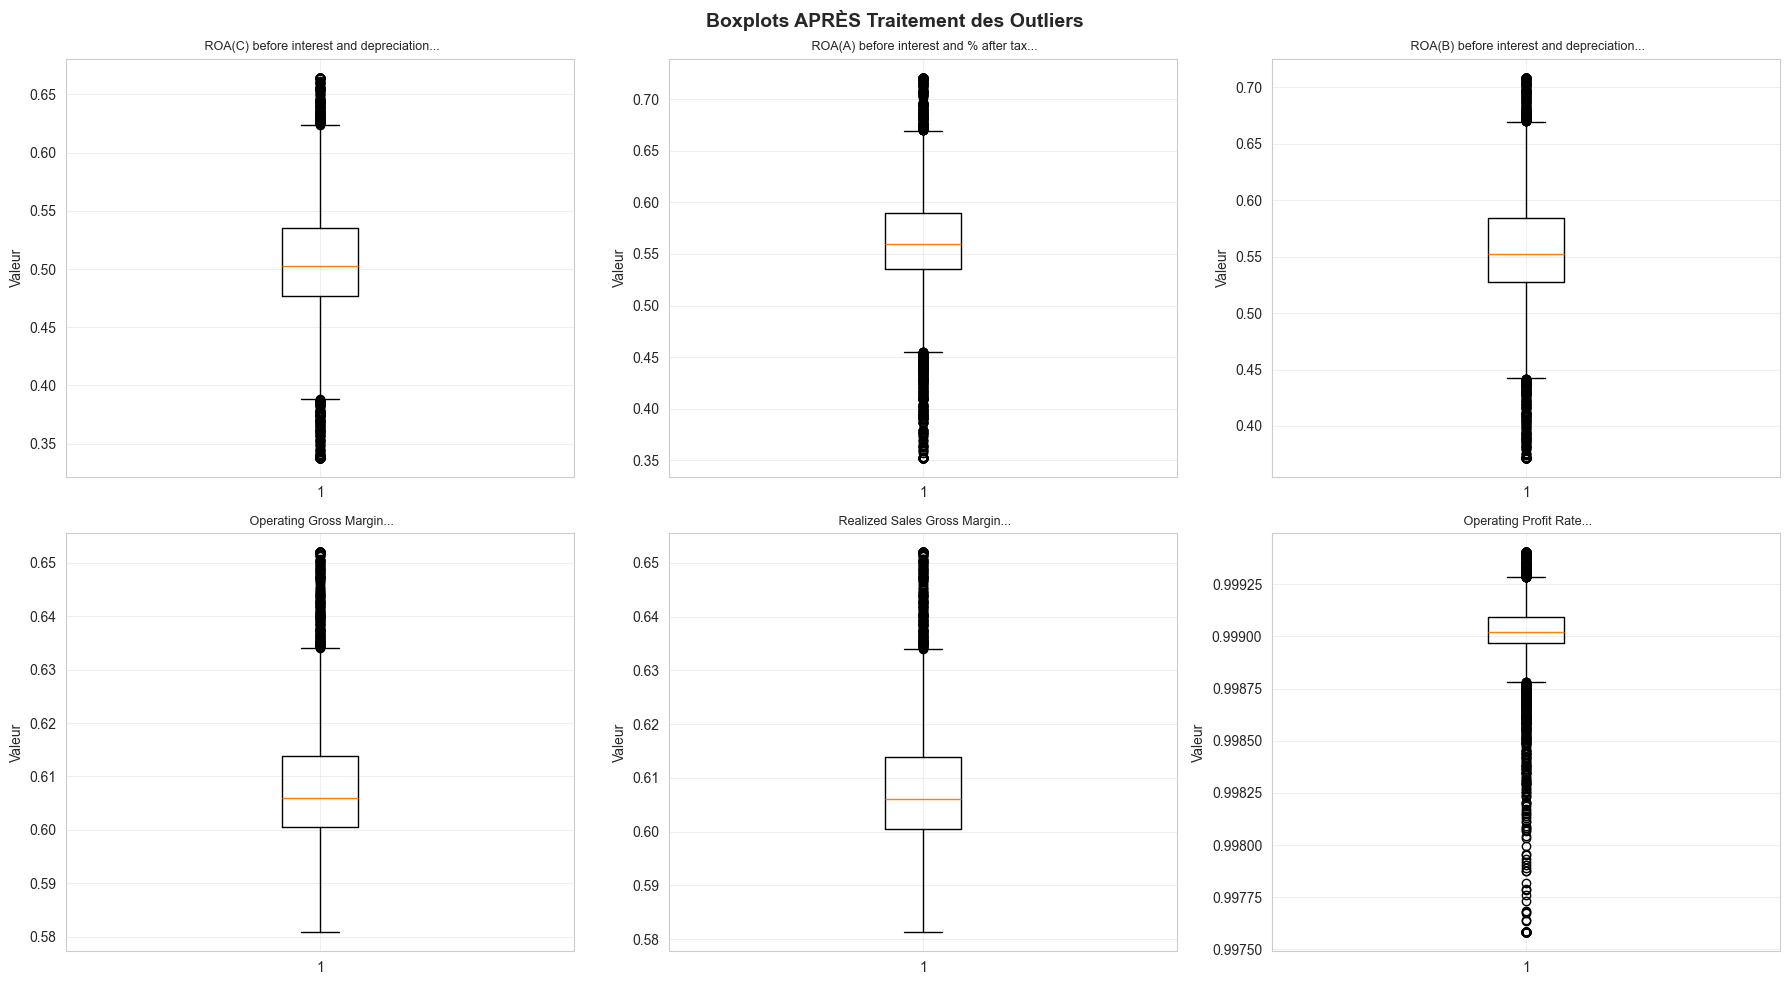


6. VÉRIFICATION DES VALEURS ABERRANTES
--------------------------------------------------------------------------------

Valeurs infinies: 0

📊 Vérification des ratios négatifs:

7. NORMALISATION DES DONNÉES
--------------------------------------------------------------------------------
✅ StandardScaler appliqué
✅ MinMaxScaler appliqué
✅ RobustScaler appliqué (RECOMMANDÉ pour données financières)


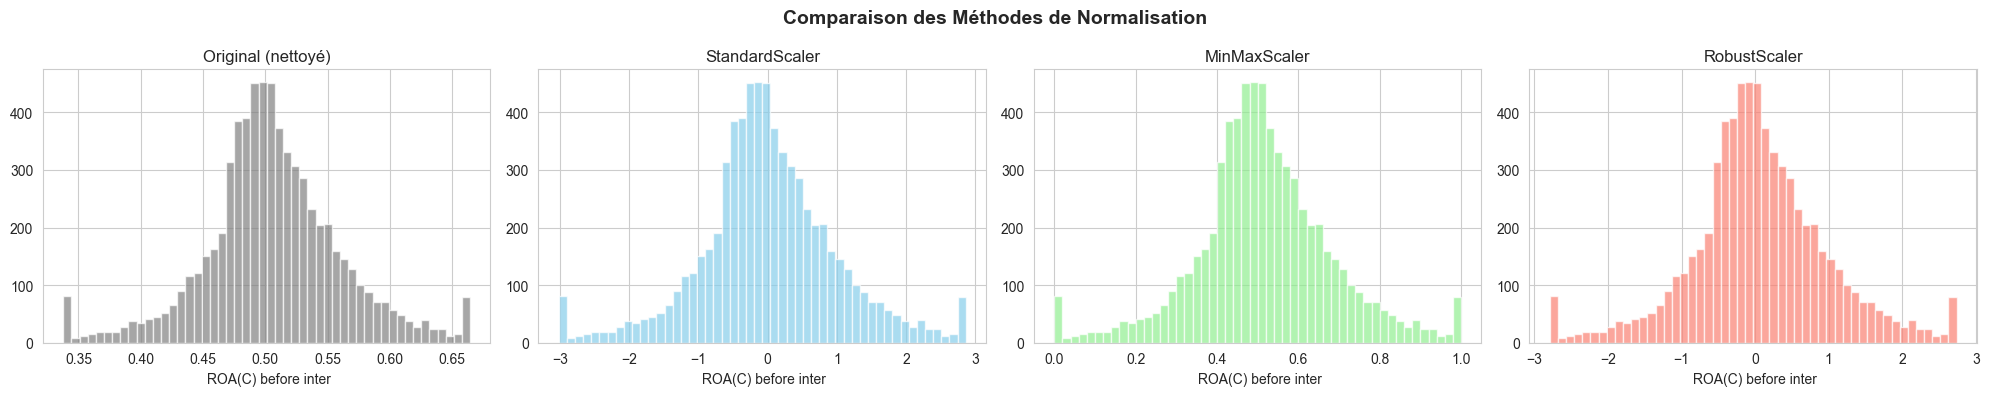


8. SÉLECTION DE LA VERSION FINALE
--------------------------------------------------------------------------------
✅ Version finale sélectionnée: RobustScaler

Dimensions finales: (6819, 96)
Valeurs manquantes: 0
Valeurs infinies: 0

9. VÉRIFICATION FINALE
--------------------------------------------------------------------------------

📊 Résumé du nettoyage:
   Observations avant: 6,819
   Observations après: 6,819
   Lignes supprimées: 0
   Variables avant: 96
   Variables après: 96
   Variables supprimées: 0
   Valeurs manquantes avant: 0
   Valeurs manquantes après: 0
   Duplicatas supprimés: 0

🎯 Distribution de la variable cible (Bankrupt?):
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Proportions:
Bankrupt?
0    0.9677
1    0.0323
Name: proportion, dtype: float64

10. SAUVEGARDE DES DONNÉES
--------------------------------------------------------------------------------
✅ Dataset nettoyé sauvegardé: ../data/cleaned/financial_data_cleaned.csv
✅ Version sans normalisa

In [2]:
# ================================================================================
# NOTEBOOK 2: NETTOYAGE DES DONNÉES
# Dataset: Taiwanese Bankruptcy Prediction
# Fichier: notebooks/02_cleaning.ipynb
# ================================================================================

"""
PROJET: Détection d'Anomalies Financières
Ce notebook effectue le nettoyage complet des données :
- Traitement des valeurs manquantes
- Suppression des duplicatas
- Traitement des outliers
- Normalisation des données
- Encodage si nécessaire
"""

# ================================================================================
# IMPORTS
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("NETTOYAGE DES DONNÉES - DÉTECTION ANOMALIES FINANCIÈRES")
print("Dataset: Taiwanese Bankruptcy Prediction")
print("=" * 80)

# ================================================================================
# 1. CHARGEMENT DES DONNÉES BRUTES
# ================================================================================

print("\n1. CHARGEMENT DES DONNÉES BRUTES")
print("-" * 80)

# Charger le dataset original
df_original = pd.read_csv('../data/raw/data1.csv')
df = df_original.copy()  # Copie de travail

print(f"✅ Dataset chargé")
print(f"Dimensions initiales: {df.shape}")
print(f"Mémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Variable cible
target_col = 'Bankrupt?'

# ================================================================================
# 2. INSPECTION INITIALE
# ================================================================================

print("\n2. INSPECTION INITIALE DE LA QUALITÉ DES DONNÉES")
print("-" * 80)

# Résumé de la qualité
print("\n📊 État initial:")
print(f"   Observations: {df.shape[0]:,}")
print(f"   Variables: {df.shape[1]}")
print(f"   Valeurs manquantes: {df.isnull().sum().sum():,}")
print(f"   Duplicatas: {df.duplicated().sum():,}")

# Types de données
print("\n📋 Types de données:")
print(df.dtypes.value_counts())

# ================================================================================
# 3. TRAITEMENT DES VALEURS MANQUANTES
# ================================================================================

print("\n3. TRAITEMENT DES VALEURS MANQUANTES")
print("-" * 80)

# Analyser les valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Manquantes': missing.values,
    'Pourcentage': missing_pct.values
})
missing_df = missing_df[missing_df['Manquantes'] > 0].sort_values('Pourcentage', ascending=False)

if len(missing_df) > 0:
    print(f"\n⚠️ Colonnes avec valeurs manquantes:")
    print(missing_df)
    
    # Stratégie 1: Supprimer colonnes avec >50% de valeurs manquantes
    threshold = 50
    cols_to_drop = missing_df[missing_df['Pourcentage'] > threshold]['Colonne'].tolist()
    
    if len(cols_to_drop) > 0:
        print(f"\n🗑️ Suppression de {len(cols_to_drop)} colonnes (>{threshold}% manquantes)")
        df = df.drop(columns=cols_to_drop)
    
    # Stratégie 2: Imputation pour le reste
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)
    
    # Compter les valeurs manquantes restantes
    remaining_missing = df[numeric_cols].isnull().sum()
    cols_with_missing = remaining_missing[remaining_missing > 0].index.tolist()
    
    if len(cols_with_missing) > 0:
        print(f"\n🔧 Imputation par la médiane pour {len(cols_with_missing)} colonnes")
        imputer = SimpleImputer(strategy='median')
        df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])
    
    print(f"\n✅ Valeurs manquantes après traitement: {df.isnull().sum().sum()}")
else:
    print("\n✅ Aucune valeur manquante détectée!")

# ================================================================================
# 4. SUPPRESSION DES DUPLICATAS
# ================================================================================

print("\n4. SUPPRESSION DES DUPLICATAS")
print("-" * 80)

duplicates_before = df.duplicated().sum()
print(f"Duplicatas détectés: {duplicates_before:,}")

if duplicates_before > 0:
    df = df.drop_duplicates()
    print(f"✅ {duplicates_before} duplicatas supprimés")
    print(f"Nouvelles dimensions: {df.shape}")
else:
    print("✅ Aucun duplicata détecté")

# ================================================================================
# 5. DÉTECTION ET TRAITEMENT DES OUTLIERS
# ================================================================================

print("\n5. DÉTECTION ET TRAITEMENT DES OUTLIERS")
print("-" * 80)

# Sélectionner les colonnes numériques (exclure la cible)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

# Fonction de détection d'outliers
def detect_outliers_iqr(data, column):
    """Détecte les outliers avec la méthode IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Compter les outliers par colonne
print("\n📊 Détection des outliers (méthode IQR):")
outlier_counts = {}
for col in numeric_features[:20]:  # Analyser les 20 premières features
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = outliers.sum()

outliers_df = pd.DataFrame(list(outlier_counts.items()), 
                           columns=['Feature', 'Outliers'])
outliers_df = outliers_df[outliers_df['Outliers'] > 0].sort_values('Outliers', ascending=False)
print(outliers_df.head(10))

# Visualisation avant traitement
key_features = numeric_features[:6]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'{col[:40]}...', fontsize=9)
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Boxplots AVANT Traitement des Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/cleaned/outliers_before.png', dpi=300, bbox_inches='tight')
plt.show()

# Traitement: Winsorization (cap aux percentiles 1 et 99)
print("\n🔧 Traitement des outliers (Winsorization)...")
df_clean = df.copy()

for col in numeric_features:
    lower = df_clean[col].quantile(0.01)
    upper = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)

print("✅ Outliers traités par winsorization (1er-99ème percentiles)")

# Visualisation après traitement
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    axes[idx].boxplot(df_clean[col].dropna(), vert=True)
    axes[idx].set_title(f'{col[:40]}...', fontsize=9)
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Boxplots APRÈS Traitement des Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/cleaned/outliers_after.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 6. VÉRIFICATION DES VALEURS ABERRANTES SPÉCIFIQUES
# ================================================================================

print("\n6. VÉRIFICATION DES VALEURS ABERRANTES")
print("-" * 80)

# Vérifier les valeurs infinies
inf_check = np.isinf(df_clean[numeric_features]).sum()
print(f"\nValeurs infinies: {inf_check.sum()}")

if inf_check.sum() > 0:
    print("🔧 Remplacement des valeurs infinies par NaN puis médiane...")
    df_clean[numeric_features] = df_clean[numeric_features].replace([np.inf, -np.inf], np.nan)
    
    # Imputer les nouvelles NaN
    for col in numeric_features:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    print("✅ Valeurs infinies traitées")

# Vérifier les valeurs négatives pour ratios qui devraient être positifs
print("\n📊 Vérification des ratios négatifs:")
ratio_cols = [' Current Ratio', ' Quick Ratio', ' Debt ratio %']
ratio_cols = [col for col in ratio_cols if col in df_clean.columns]

for col in ratio_cols:
    neg_count = (df_clean[col] < 0).sum()
    if neg_count > 0:
        print(f"   {col}: {neg_count} valeurs négatives")
        # Remplacer par la médiane des valeurs positives
        positive_median = df_clean[df_clean[col] >= 0][col].median()
        df_clean.loc[df_clean[col] < 0, col] = positive_median

# ================================================================================
# 7. NORMALISATION DES DONNÉES
# ================================================================================

print("\n7. NORMALISATION DES DONNÉES")
print("-" * 80)

# Créer 3 versions normalisées
df_standard = df_clean.copy()
df_minmax = df_clean.copy()
df_robust = df_clean.copy()

# StandardScaler (moyenne=0, écart-type=1)
scaler_standard = StandardScaler()
df_standard[numeric_features] = scaler_standard.fit_transform(df_clean[numeric_features])
print("✅ StandardScaler appliqué")

# MinMaxScaler (entre 0 et 1)
scaler_minmax = MinMaxScaler()
df_minmax[numeric_features] = scaler_minmax.fit_transform(df_clean[numeric_features])
print("✅ MinMaxScaler appliqué")

# RobustScaler (résistant aux outliers) - RECOMMANDÉ
scaler_robust = RobustScaler()
df_robust[numeric_features] = scaler_robust.fit_transform(df_clean[numeric_features])
print("✅ RobustScaler appliqué (RECOMMANDÉ pour données financières)")

# Comparaison visuelle
if len(numeric_features) > 0:
    feature_example = numeric_features[0]
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    
    # Original
    axes[0].hist(df_clean[feature_example], bins=50, color='gray', alpha=0.7)
    axes[0].set_title('Original (nettoyé)')
    axes[0].set_xlabel(feature_example[:20])
    
    # StandardScaler
    axes[1].hist(df_standard[feature_example], bins=50, color='skyblue', alpha=0.7)
    axes[1].set_title('StandardScaler')
    axes[1].set_xlabel(feature_example[:20])
    
    # MinMaxScaler
    axes[2].hist(df_minmax[feature_example], bins=50, color='lightgreen', alpha=0.7)
    axes[2].set_title('MinMaxScaler')
    axes[2].set_xlabel(feature_example[:20])
    
    # RobustScaler
    axes[3].hist(df_robust[feature_example], bins=50, color='salmon', alpha=0.7)
    axes[3].set_title('RobustScaler')
    axes[3].set_xlabel(feature_example[:20])
    
    plt.suptitle('Comparaison des Méthodes de Normalisation', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../data/cleaned/normalization_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ================================================================================
# 8. SÉLECTION DE LA VERSION FINALE
# ================================================================================

print("\n8. SÉLECTION DE LA VERSION FINALE")
print("-" * 80)

# Utiliser RobustScaler comme version finale (meilleur pour données financières)
df_final = df_robust.copy()

print(f"✅ Version finale sélectionnée: RobustScaler")
print(f"\nDimensions finales: {df_final.shape}")
print(f"Valeurs manquantes: {df_final.isnull().sum().sum()}")
print(f"Valeurs infinies: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")

# ================================================================================
# 9. VÉRIFICATION FINALE DE LA QUALITÉ
# ================================================================================

print("\n9. VÉRIFICATION FINALE")
print("-" * 80)

# Statistiques de nettoyage
cleaning_stats = {
    'Observations avant': df_original.shape[0],
    'Observations après': df_final.shape[0],
    'Lignes supprimées': df_original.shape[0] - df_final.shape[0],
    'Variables avant': df_original.shape[1],
    'Variables après': df_final.shape[1],
    'Variables supprimées': df_original.shape[1] - df_final.shape[1],
    'Valeurs manquantes avant': df_original.isnull().sum().sum(),
    'Valeurs manquantes après': df_final.isnull().sum().sum(),
    'Duplicatas supprimés': duplicates_before,
}

print("\n📊 Résumé du nettoyage:")
for key, value in cleaning_stats.items():
    print(f"   {key}: {value:,}")

# Vérifier la distribution de la variable cible
print(f"\n🎯 Distribution de la variable cible (Bankrupt?):")
print(df_final[target_col].value_counts())
print(f"\nProportions:")
print(df_final[target_col].value_counts(normalize=True).round(4))

# ================================================================================
# 10. SAUVEGARDE DES DONNÉES NETTOYÉES
# ================================================================================

print("\n10. SAUVEGARDE DES DONNÉES")
print("-" * 80)

# Sauvegarder le dataset nettoyé
df_final.to_csv('../data/cleaned/financial_data_cleaned.csv', index=False)
print("✅ Dataset nettoyé sauvegardé: ../data/cleaned/financial_data_cleaned.csv")

# Sauvegarder aussi la version sans normalisation (pour certaines analyses)
df_clean.to_csv('../data/cleaned/financial_data_cleaned_no_scaling.csv', index=False)
print("✅ Version sans normalisation: ../data/cleaned/financial_data_cleaned_no_scaling.csv")

# Sauvegarder les scalers pour réutilisation
import pickle

with open('../data/cleaned/robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_robust, f)
print("✅ RobustScaler sauvegardé: ../data/cleaned/robust_scaler.pkl")

# Sauvegarder la liste des features numériques
with open('../data/cleaned/numeric_features.txt', 'w') as f:
    f.write('\n'.join(numeric_features))
print("✅ Liste des features numériques sauvegardée")

# ================================================================================
# 11. RAPPORT DE NETTOYAGE
# ================================================================================

print("\n" + "=" * 80)
print("RAPPORT DE NETTOYAGE")
print("=" * 80)

report = f"""
RAPPORT DE NETTOYAGE DES DONNÉES
=================================
Dataset: Taiwanese Bankruptcy Prediction
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}

DONNÉES ORIGINALES:
------------------
• Observations: {df_original.shape[0]:,}
• Variables: {df_original.shape[1]}
• Valeurs manquantes: {df_original.isnull().sum().sum():,} ({(df_original.isnull().sum().sum()/(df_original.shape[0]*df_original.shape[1])*100):.2f}%)
• Duplicatas: {duplicates_before:,}

DONNÉES NETTOYÉES:
-----------------
• Observations: {df_final.shape[0]:,} ({(df_final.shape[0]/df_original.shape[0]*100):.1f}% conservées)
• Variables: {df_final.shape[1]}
• Valeurs manquantes: {df_final.isnull().sum().sum()}
• Valeurs infinies: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}

TRAITEMENTS APPLIQUÉS:
---------------------
1. Suppression des colonnes avec >50% de valeurs manquantes
2. Imputation par la médiane pour valeurs manquantes restantes
3. Suppression de {duplicates_before:,} lignes dupliquées
4. Traitement des outliers par winsorization (1er-99ème percentiles)
5. Traitement des valeurs infinies et négatives aberrantes
6. Normalisation avec RobustScaler (résistant aux outliers)

DISTRIBUTION VARIABLE CIBLE:
---------------------------
{df_final[target_col].value_counts().to_string()}

Proportions:
{df_final[target_col].value_counts(normalize=True).to_string()}


QUALITÉ FINALE:
--------------
✓ Aucune valeur manquante
✓ Aucune valeur infinie
✓ Aucun duplicata
✓ Outliers traités
✓ Données normalisées
✓ Prêt pour la modélisation

"""

print(report)

# Sauvegarder le rapport
with open('../data/cleaned/cleaning_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("\n✅ Nettoyage terminé avec succès!")
print("📄 Rapport sauvegardé: ../data/cleaned/cleaning_report.txt")
print("=" * 80)